In [1]:
import pandas as pd
import numpy as np

In [2]:
airbnb_train = pd.read_csv('airbnb_train.csv', sep=",")
airbnb_test = pd.read_csv('airbnb_test.csv', sep=",")

Partie 1 : Gestion des données

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
airbnb_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,LA,Large bright airy room with 2 balconies and Ja...,NaN,t,f,NaN,2015-12-12,t,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,NYC,Private room for rent in a six bedroom apt wit...,2017-05-07,t,t,100%,2016-11-04,t,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",NaN,t,f,NaN,2016-12-11,t,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,NYC,My place is close to Manhattan. You can see th...,2016-10-07,t,t,100%,2012-08-04,f,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,SF,This beautiful home can be your dream destinat...,2016-09-25,t,t,100%,2013-07-25,f,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [5]:
airbnb_train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [7]:
airbnb_train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.223400e+04,22234.000000,22234.000000,22183.000000,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
std,6.080480e+06,0.718758,2.143870,0.586246,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903
min,3.362000e+03,2.302585,1.000000,0.000000,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,2.120450e+07,7.600402,16.000000,8.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000


In [8]:
print(airbnb_train.shape, airbnb_train.ndim, airbnb_train.size)

(22234, 28) 2 622552


In [9]:
nan_percentage = airbnb_train.isna().mean() * 100
print(nan_percentage)

id                         0.000000
log_price                  0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.229378
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.251237
host_has_profile_pic       0.251867
host_identity_verified     0.251867
host_response_rate        24.624449
host_since                 0.251867
instant_bookable           0.000000
last_review               21.210758
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.382028
number_of_reviews          0.000000
review_scores_rating      22.389134
zipcode                    1.362778
bedrooms                   0.116938
beds                       0

Ici on à décider de supprimer les lignes des colonnes pour lesquels il y'avait moins de 2% de données manquantes :

In [10]:
columns_to_drop_na = nan_percentage[nan_percentage < 2].index

In [11]:
airbnb_train = airbnb_train.dropna(subset=columns_to_drop_na)

In [12]:
print(airbnb_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21783 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21783 non-null  int64  
 1   log_price               21783 non-null  float64
 2   property_type           21783 non-null  object 
 3   room_type               21783 non-null  object 
 4   amenities               21783 non-null  object 
 5   accommodates            21783 non-null  int64  
 6   bathrooms               21783 non-null  float64
 7   bed_type                21783 non-null  object 
 8   cancellation_policy     21783 non-null  object 
 9   cleaning_fee            21783 non-null  bool   
 10  city                    21783 non-null  object 
 11  description             21783 non-null  object 
 12  first_review            17170 non-null  object 
 13  host_has_profile_pic    21783 non-null  object 
 14  host_identity_verified  21783 non-null  obj

On trace et regarde les différents types de propriété :

In [13]:
import matplotlib.pyplot as plt

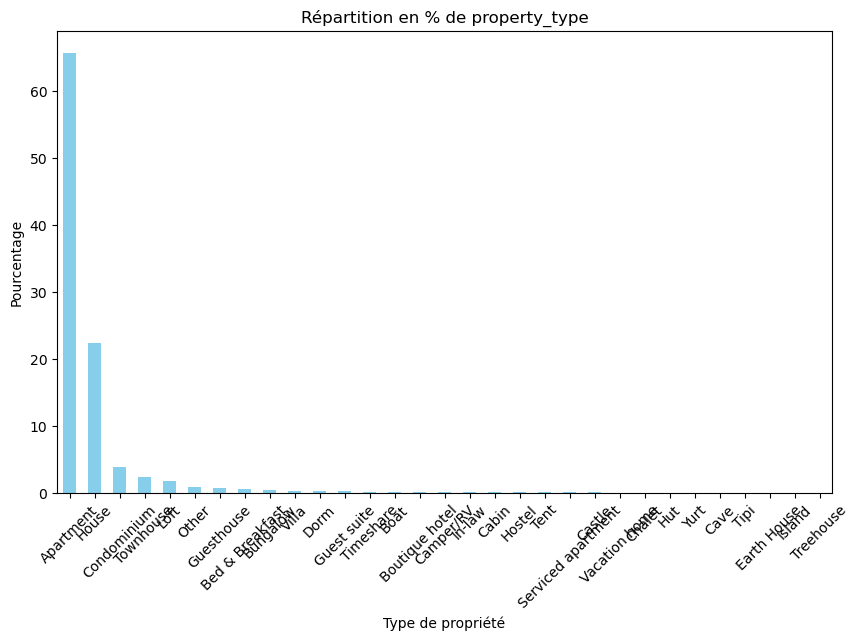

In [14]:
property_type_counts = airbnb_train['property_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
property_type_counts.plot.bar(color='skyblue')
plt.title('Répartition en % de property_type')
plt.xlabel('Type de propriété')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()

Ici on vient tracer la répartition des différentes 'room'

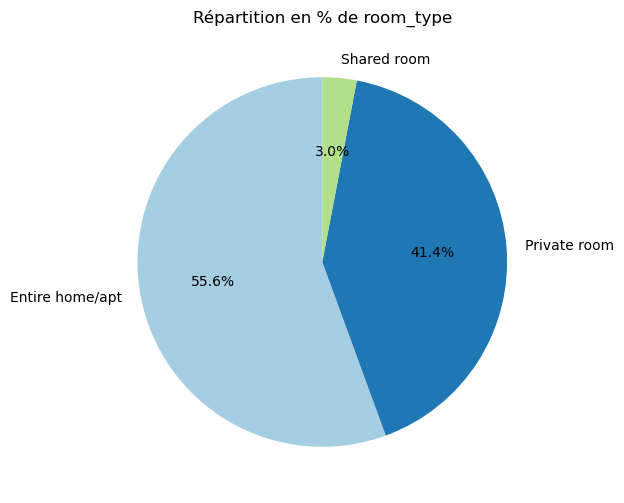

In [15]:
room_type_counts = airbnb_train['room_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
room_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Répartition en % de room_type')
plt.ylabel('')  
plt.show()

On transforme les frais de ménage (bool) en des int à l'aide de astype

In [16]:
airbnb_train['cleaning_fee'] = airbnb_train['cleaning_fee'].astype(int)

In [17]:
cleaning_fee_counts = airbnb_train['cleaning_fee'].value_counts()

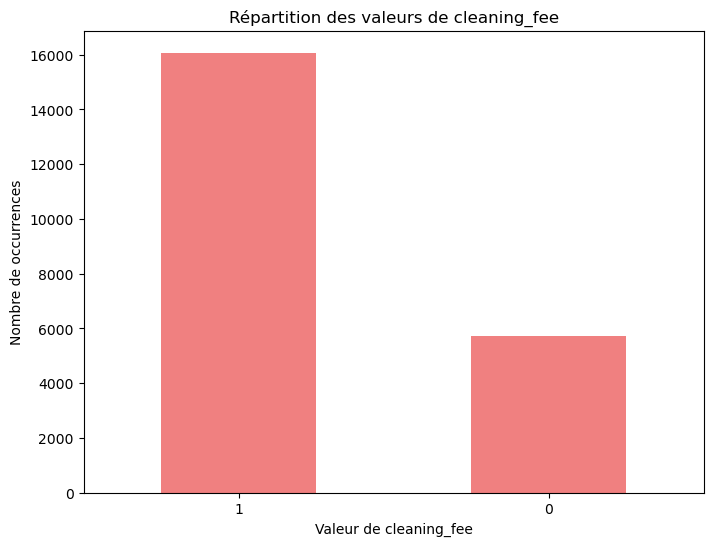

In [18]:
plt.figure(figsize=(8, 6))
cleaning_fee_counts.plot.bar(color='lightcoral')
plt.title('Répartition des valeurs de cleaning_fee')
plt.xlabel('Valeur de cleaning_fee')
plt.ylabel('Nombre de occurrences')
plt.xticks(rotation=0)
plt.show()

Ici on a voulu séparer les données de types numériques (int, float) des données de type objects

In [19]:
numeric_columns = airbnb_train.select_dtypes(include=['number']).columns
object_columns = airbnb_train.select_dtypes(include=['object']).columns

In [20]:
airbnb_train[numeric_columns].isna().mean() * 100

id                       0.000000
log_price                0.000000
accommodates             0.000000
bathrooms                0.000000
cleaning_fee             0.000000
latitude                 0.000000
longitude                0.000000
number_of_reviews        0.000000
review_scores_rating    22.288023
bedrooms                 0.000000
beds                     0.000000
dtype: float64

In [21]:
airbnb_train[object_columns].isna().mean() * 100

property_type              0.000000
room_type                  0.000000
amenities                  0.000000
bed_type                   0.000000
cancellation_policy        0.000000
city                       0.000000
description                0.000000
first_review              21.177065
host_has_profile_pic       0.000000
host_identity_verified     0.000000
host_response_rate        24.353854
host_since                 0.000000
instant_bookable           0.000000
last_review               21.149520
name                       0.000000
neighbourhood              9.007024
zipcode                    0.000000
dtype: float64

In [22]:
airbnb_train['review_scores_rating'].fillna(-1, inplace=True) ##On remplace les données nan en -1 pour un bien qui n'a pas de notation

In [23]:
airbnb_train = airbnb_train.drop(columns=['first_review', 'last_review']) #Nous avons décidé de supprimer 2 colonnes qui nous semblaient peu intéressantes

In [24]:
airbnb_train.isna().mean() * 100

id                         0.000000
log_price                  0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.000000
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
host_has_profile_pic       0.000000
host_identity_verified     0.000000
host_response_rate        24.353854
host_since                 0.000000
instant_bookable           0.000000
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.007024
number_of_reviews          0.000000
review_scores_rating       0.000000
zipcode                    0.000000
bedrooms                   0.000000
beds                       0.000000
dtype: float64

In [25]:
airbnb_train['zipcode']

0          90804
1          11385
2          20009
3          11104
4          94131
          ...   
22229    11206.0
22230      90254
22231    11206.0
22232      10011
22233      90802
Name: zipcode, Length: 21783, dtype: object

Ici on est venu transformer les zipcodes en données numériques

In [26]:
airbnb_train['zipcode'] = pd.to_numeric(airbnb_train['zipcode'], errors='coerce')

In [27]:
airbnb_train['host_response_rate']

0         NaN
1        100%
2         NaN
3        100%
4        100%
         ... 
22229     NaN
22230    100%
22231    100%
22232    100%
22233    100%
Name: host_response_rate, Length: 21783, dtype: object

Ici on vient également modofier les données de host_response_rate en int

In [28]:
def convert_response_rate(rate):
    if pd.isna(rate):
        return -1  
    else:
        return float(rate.strip('%')) / 100.0

In [29]:
airbnb_train['host_response_rate'] = airbnb_train['host_response_rate'].apply(convert_response_rate)

In [30]:
airbnb_train.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,0,LA,Large bright airy room with 2 balconies and Ja...,t,f,-1.0,2015-12-12,t,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,-1.0,90804.0,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,0,NYC,Private room for rent in a six bedroom apt wit...,t,t,1.0,2016-11-04,t,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385.0,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,0,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",t,f,-1.0,2016-12-11,t,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,-1.0,20009.0,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,1,NYC,My place is close to Manhattan. You can see th...,t,t,1.0,2012-08-04,f,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104.0,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,1,SF,This beautiful home can be your dream destinat...,t,t,1.0,2013-07-25,f,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131.0,2.0,2.0


In [31]:
airbnb_train.isna().mean() * 100

id                        0.000000
log_price                 0.000000
property_type             0.000000
room_type                 0.000000
amenities                 0.000000
accommodates              0.000000
bathrooms                 0.000000
bed_type                  0.000000
cancellation_policy       0.000000
cleaning_fee              0.000000
city                      0.000000
description               0.000000
host_has_profile_pic      0.000000
host_identity_verified    0.000000
host_response_rate        0.000000
host_since                0.000000
instant_bookable          0.000000
latitude                  0.000000
longitude                 0.000000
name                      0.000000
neighbourhood             9.007024
number_of_reviews         0.000000
review_scores_rating      0.000000
zipcode                   0.027544
bedrooms                  0.000000
beds                      0.000000
dtype: float64

In [32]:
airbnb_train['neighbourhood'].fillna('Inconnu', inplace=True) #Les valeurs nan deviennent des inconnus

In [33]:
airbnb_train = airbnb_train.dropna(subset=['zipcode'])

In [34]:
airbnb_train.isna().mean() * 100

id                        0.0
log_price                 0.0
property_type             0.0
room_type                 0.0
amenities                 0.0
accommodates              0.0
bathrooms                 0.0
bed_type                  0.0
cancellation_policy       0.0
cleaning_fee              0.0
city                      0.0
description               0.0
host_has_profile_pic      0.0
host_identity_verified    0.0
host_response_rate        0.0
host_since                0.0
instant_bookable          0.0
latitude                  0.0
longitude                 0.0
name                      0.0
neighbourhood             0.0
number_of_reviews         0.0
review_scores_rating      0.0
zipcode                   0.0
bedrooms                  0.0
beds                      0.0
dtype: float64

In [35]:
airbnb_train.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,0,LA,Large bright airy room with 2 balconies and Ja...,t,f,-1.0,2015-12-12,t,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,-1.0,90804.0,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,0,NYC,Private room for rent in a six bedroom apt wit...,t,t,1.0,2016-11-04,t,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385.0,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,0,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",t,f,-1.0,2016-12-11,t,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,-1.0,20009.0,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,1,NYC,My place is close to Manhattan. You can see th...,t,t,1.0,2012-08-04,f,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104.0,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,1,SF,This beautiful home can be your dream destinat...,t,t,1.0,2013-07-25,f,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131.0,2.0,2.0


Ici on remplace tous les t | f en 1 | 0

In [36]:
airbnb_train['host_has_profile_pic'] = airbnb_train['host_has_profile_pic'].replace({'t': 1, 'f': 0})
airbnb_train['host_identity_verified'] = airbnb_train['host_identity_verified'].replace({'t': 1, 'f': 0})
airbnb_train['instant_bookable'] = airbnb_train['instant_bookable'].replace({'t': 1, 'f': 0})

On va maintenant passer à l'encodeur de labels pour : 
- cancellation_policy
- bed_type
- room_type
- property_type

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()

In [39]:
airbnb_train['cancellation_policy'] = label_encoder.fit_transform(airbnb_train['cancellation_policy'])

In [40]:
airbnb_train['cancellation_policy']

0        0
1        2
2        0
3        0
4        1
        ..
22229    0
22230    1
22231    1
22232    2
22233    1
Name: cancellation_policy, Length: 21777, dtype: int32

In [41]:
airbnb_train['bed_type'] = label_encoder.fit_transform(airbnb_train['bed_type'])

In [42]:
airbnb_train['bed_type'].unique()

array([4, 3, 2, 0, 1])

In [43]:
airbnb_train['bed_type']

0        4
1        4
2        4
3        4
4        4
        ..
22229    4
22230    4
22231    4
22232    4
22233    4
Name: bed_type, Length: 21777, dtype: int32

In [44]:
airbnb_train['room_type'] = label_encoder.fit_transform(airbnb_train['room_type'])

In [45]:
airbnb_train['property_type'] = label_encoder.fit_transform(airbnb_train['property_type'])

In [46]:
airbnb_train.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,16,1,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,4,0,0,LA,Large bright airy room with 2 balconies and Ja...,1,0,-1.0,2015-12-12,1,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,-1.0,90804.0,0.0,2.0
1,14483613,4.007333,16,1,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,4,2,0,NYC,Private room for rent in a six bedroom apt wit...,1,1,1.0,2016-11-04,1,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385.0,1.0,2.0
2,10412649,7.090077,0,0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,4,0,0,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",1,0,-1.0,2016-12-11,1,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,-1.0,20009.0,2.0,2.0
3,17954362,3.555348,16,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,4,0,1,NYC,My place is close to Manhattan. You can see th...,1,1,1.0,2012-08-04,0,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104.0,1.0,1.0
4,9969781,5.480639,16,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,1,SF,This beautiful home can be your dream destinat...,1,1,1.0,2013-07-25,0,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131.0,2.0,2.0


On va venir supprimer les colonnes name et description qui sont beaucoup trop vague pour être encodés

In [47]:
airbnb_train = airbnb_train.drop(columns=['name', 'description'])

In [48]:
airbnb_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,16,1,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,4,0,0,LA,1,0,-1.0,2015-12-12,1,33.782712,-118.134410,Long Beach,0,-1.0,90804.0,0.0,2.0
1,14483613,4.007333,16,1,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,4,2,0,NYC,1,1,1.0,2016-11-04,1,40.705468,-73.909439,Ridgewood,38,86.0,11385.0,1.0,2.0
2,10412649,7.090077,0,0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,4,0,0,DC,1,0,-1.0,2016-12-11,1,38.917537,-77.031651,U Street Corridor,0,-1.0,20009.0,2.0,2.0
3,17954362,3.555348,16,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,4,0,1,NYC,1,1,1.0,2012-08-04,0,40.736001,-73.924248,Sunnyside,19,96.0,11104.0,1.0,1.0
4,9969781,5.480639,16,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,1,SF,1,1,1.0,2013-07-25,0,37.744896,-122.430665,Noe Valley,15,96.0,94131.0,2.0,2.0


In [49]:
from datetime import datetime

Au lieu de garder host_since en date on va convertir en int avec la date actuelle - la date host_since. Cela nous donnera la durée de détention en mois. 

In [50]:
airbnb_train['host_since'] = pd.to_datetime(airbnb_train['host_since'], errors='coerce')

In [51]:
def calculate_months_since(date):
    if pd.isna(date):
        return -1  
    today = datetime.today()
    return (today.year - date.year) * 12 + today.month - date.month


In [52]:
airbnb_train['host_since'] = airbnb_train['host_since'].apply(calculate_months_since)

In [53]:
airbnb_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,16,1,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,4,0,0,LA,1,0,-1.0,102,1,33.782712,-118.134410,Long Beach,0,-1.0,90804.0,0.0,2.0
1,14483613,4.007333,16,1,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,4,2,0,NYC,1,1,1.0,91,1,40.705468,-73.909439,Ridgewood,38,86.0,11385.0,1.0,2.0
2,10412649,7.090077,0,0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,4,0,0,DC,1,0,-1.0,90,1,38.917537,-77.031651,U Street Corridor,0,-1.0,20009.0,2.0,2.0
3,17954362,3.555348,16,1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,4,0,1,NYC,1,1,1.0,142,0,40.736001,-73.924248,Sunnyside,19,96.0,11104.0,1.0,1.0
4,9969781,5.480639,16,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,1,SF,1,1,1.0,131,0,37.744896,-122.430665,Noe Valley,15,96.0,94131.0,2.0,2.0


In [54]:
airbnb_train['amenities'] 

0        {TV,"Wireless Internet",Kitchen,"Free parking ...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Wireless Internet","Air conditioning",Kit...
3        {TV,"Cable TV",Internet,"Wireless Internet","A...
4        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                               ...                        
22229                                                   {}
22230    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
22231    {TV,Internet,"Wireless Internet","Air conditio...
22232    {TV,"Wireless Internet","Air conditioning",Kit...
22233    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 21777, dtype: object

Pour cette partie nous avons décider de transformer la colonne amenities en amenities_num qui compte le nombre d'objets présent tout simplement 

In [55]:
airbnb_train['amenities'] = airbnb_train['amenities'].str.replace('[{}]', '', regex=True).str.replace('"', '')

In [56]:
airbnb_train['num_amenities'] = airbnb_train['amenities'].str.split(',').apply(len)

In [57]:
airbnb_train = airbnb_train.drop(columns=['amenities'])

In [58]:
airbnb_train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,num_amenities
0,5708593,4.317488,16,1,3,1.0,4,0,0,LA,1,0,-1.0,102,1,33.782712,-118.134410,Long Beach,0,-1.0,90804.0,0.0,2.0,15
1,14483613,4.007333,16,1,4,2.0,4,2,0,NYC,1,1,1.0,91,1,40.705468,-73.909439,Ridgewood,38,86.0,11385.0,1.0,2.0,25
2,10412649,7.090077,0,0,6,2.0,4,0,0,DC,1,0,-1.0,90,1,38.917537,-77.031651,U Street Corridor,0,-1.0,20009.0,2.0,2.0,20
3,17954362,3.555348,16,1,1,1.0,4,0,1,NYC,1,1,1.0,142,0,40.736001,-73.924248,Sunnyside,19,96.0,11104.0,1.0,1.0,30
4,9969781,5.480639,16,0,4,1.0,4,1,1,SF,1,1,1.0,131,0,37.744896,-122.430665,Noe Valley,15,96.0,94131.0,2.0,2.0,24


In [59]:
airbnb_train['city'].unique()

array(['LA', 'NYC', 'DC', 'SF', 'Chicago', 'Boston'], dtype=object)

Ici on a décider d'encoder également les villes

In [60]:
airbnb_train['city'] = label_encoder.fit_transform(airbnb_train['city'])

In [61]:
airbnb_train['neighbourhood']

0               Long Beach
1                Ridgewood
2        U Street Corridor
3                Sunnyside
4               Noe Valley
               ...        
22229         Williamsburg
22230        Hermosa Beach
22231         Williamsburg
22232         West Village
22233           Long Beach
Name: neighbourhood, Length: 21777, dtype: object

Ici nous nous sommes rendus comptes qu'il y'avait trop de neighbourhood différents et nous avons donc décider de supprimer cette colonnes

In [62]:
airbnb_train = airbnb_train.drop(columns=['neighbourhood'])

Ici nous avons calculés de nouvelles statistiques : 

In [63]:
airbnb_train['bedrooms_bathrooms_ratio'] = airbnb_train['bedrooms'] / airbnb_train['bathrooms']
airbnb_train['beds_bedrooms_ratio'] = airbnb_train['beds'] / airbnb_train['bedrooms']
airbnb_train['accommodates_bathrooms_ratio'] = airbnb_train['accommodates'] / airbnb_train['bathrooms']
airbnb_train['latitude_longitude_interaction'] = airbnb_train['latitude'] * airbnb_train['longitude']

In [64]:
airbnb_train.replace([np.inf, -np.inf], 0, inplace=True)
airbnb_train.fillna(0, inplace=True)

In [65]:
import seaborn as sns

In [66]:
correlation_matrix = airbnb_train.corr() #Matrice de corrélation 

In [67]:
correlation_matrix

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,num_amenities,bedrooms_bathrooms_ratio,beds_bedrooms_ratio,accommodates_bathrooms_ratio,latitude_longitude_interaction
id,1.000000,-0.003655,0.011885,-0.007161,0.001555,0.001743,-0.002182,-0.007737,0.010078,0.001682,-0.021192,-0.008353,0.004829,-0.002327,-0.000840,-0.004940,-0.005634,-0.003616,-0.009913,0.006065,0.003123,0.002259,0.005788,0.001989,0.005692,0.001050,-0.005311
log_price,-0.003655,1.000000,0.040620,-0.602045,0.565797,0.368801,0.096497,0.126900,0.116450,0.035205,-0.013930,0.030291,-0.045101,0.073314,-0.039237,0.006254,-0.044269,-0.038940,-0.074991,0.031716,0.472990,0.435984,0.199548,0.223185,0.027135,0.374323,-0.072944
property_type,0.011885,0.040620,1.000000,0.082531,0.170995,0.254515,0.010069,0.026527,0.029656,-0.098788,0.008341,0.018708,0.125832,-0.020981,0.019881,-0.301744,-0.289824,0.044145,0.019811,0.292583,0.223979,0.181178,0.105406,0.058107,0.066550,0.002743,-0.257413
room_type,-0.007161,-0.602045,0.082531,1.000000,-0.459376,-0.125421,-0.152283,-0.168487,-0.217856,0.055405,0.000342,-0.075792,-0.027085,-0.077557,0.019426,0.016515,0.025635,-0.034117,-0.087894,-0.026364,-0.246083,-0.313408,-0.176752,-0.141242,0.060325,-0.454607,0.030196
accommodates,0.001555,0.565797,0.170995,-0.459376,1.000000,0.516820,0.074071,0.206480,0.188178,-0.094061,-0.011195,0.062421,0.130936,-0.011885,0.062864,-0.066408,-0.079704,0.046961,0.052447,0.092419,0.713977,0.816470,0.271447,0.399910,0.327926,0.735537,-0.080643
bathrooms,0.001743,0.368801,0.254515,-0.125421,0.516820,1.000000,0.040818,0.087928,0.050477,-0.073965,-0.008962,0.013081,0.044610,-0.006483,-0.005580,-0.123125,-0.124491,-0.044545,-0.030789,0.129433,0.602624,0.536670,0.156369,-0.034937,0.139531,-0.082578,-0.114160
bed_type,-0.002182,0.096497,0.010069,-0.152283,0.074071,0.040818,1.000000,0.035026,0.029535,0.014588,-0.008407,0.001313,0.030962,-0.018585,0.025408,-0.000239,0.000850,-0.000943,0.000488,-0.003069,0.049821,0.062876,0.026871,0.033821,0.029892,0.066382,0.001063
cancellation_policy,-0.007737,0.126900,0.026527,-0.168487,0.206480,0.087928,0.035026,1.000000,0.334356,-0.016454,0.030349,0.158792,0.291015,0.140379,0.014947,0.026298,0.016092,0.194361,0.262202,-0.016553,0.127457,0.168642,0.227914,0.074913,0.070085,0.176251,0.010899
cleaning_fee,0.010078,0.116450,0.029656,-0.217856,0.188178,0.050477,0.029535,0.334356,1.000000,-0.029495,0.030312,0.163303,0.251738,0.089357,0.015380,-0.044963,-0.051079,0.118122,0.249244,0.050836,0.108800,0.133857,0.240620,0.080401,0.041064,0.186769,-0.047776
city,0.001682,0.035205,-0.098788,0.055405,-0.094061,-0.073965,0.014588,-0.016454,-0.029495,1.000000,0.005293,-0.026652,-0.130832,0.057780,-0.057338,-0.017047,-0.073337,-0.033027,-0.028001,0.000137,-0.059171,-0.060934,-0.117216,-0.013428,-0.018833,-0.058793,-0.111373


In [68]:
log_price_corr = correlation_matrix['log_price'].sort_values(ascending=False)

In [69]:
log_price_corr_df = log_price_corr.to_frame().reset_index()
log_price_corr_df.columns = ['Feature', 'Correlation']

On affiche la nouvelle matrice de corrélation de log_price

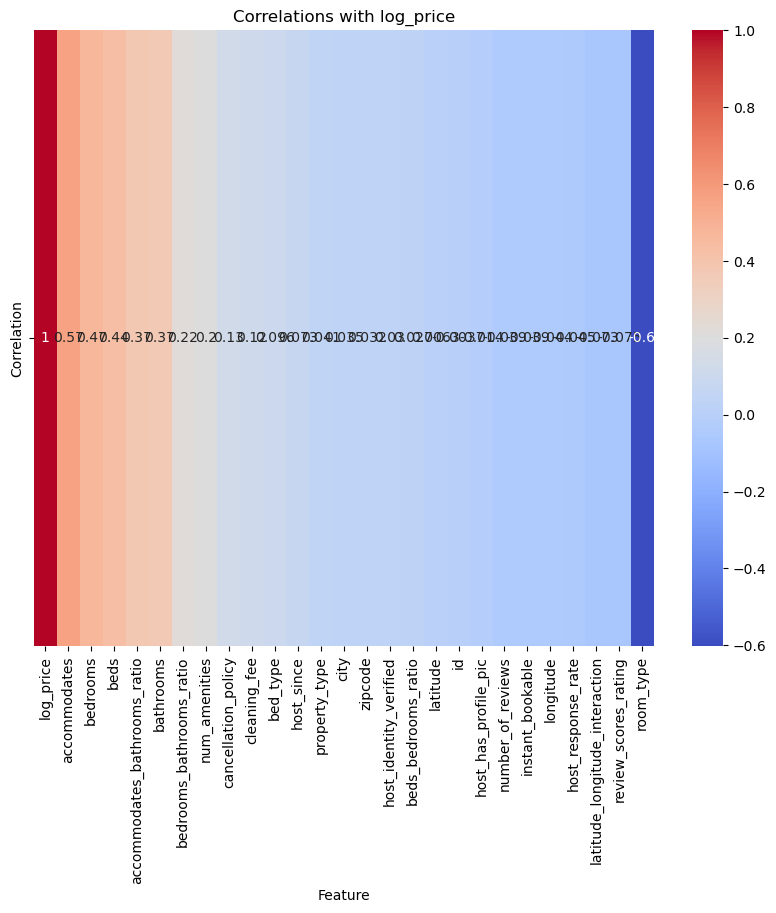

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(log_price_corr_df.set_index('Feature').T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlations with log_price')
plt.show()

Ici on calcule différentes corrélations avec log_price

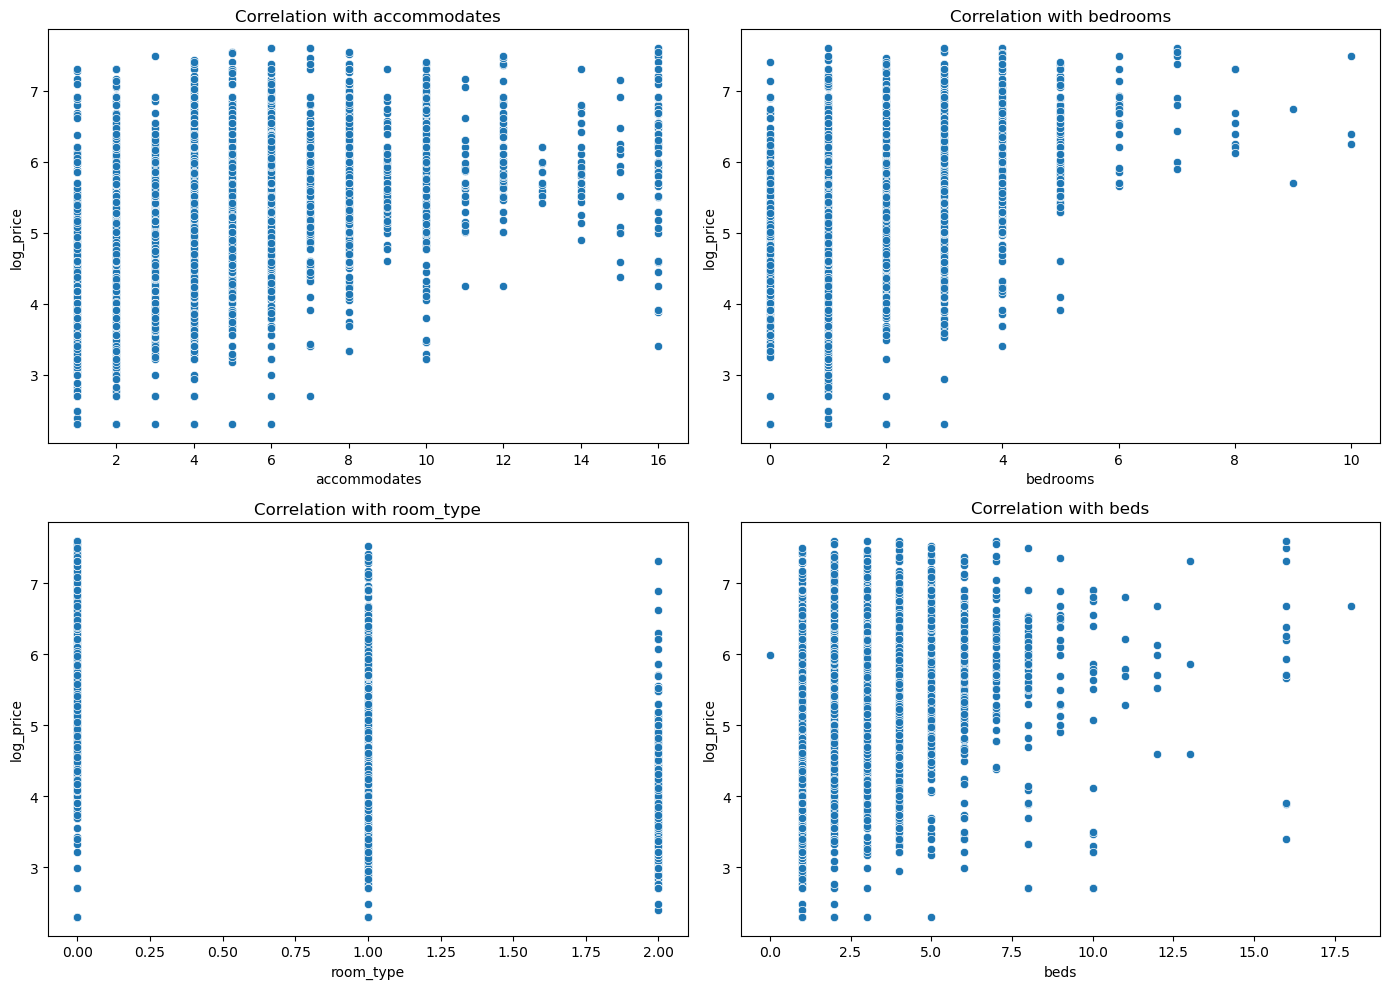

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(ax=axes[0, 0], x=airbnb_train["accommodates"], y=airbnb_train['log_price'])
axes[0, 0].set_title(f'Correlation with accommodates')

sns.scatterplot(ax=axes[0, 1], x=airbnb_train["bedrooms"], y=airbnb_train['log_price'])
axes[0, 1].set_title(f'Correlation with bedrooms')

sns.scatterplot(ax=axes[1, 0], x=airbnb_train["room_type"], y=airbnb_train['log_price'])
axes[1, 0].set_title(f'Correlation with room_type')

sns.scatterplot(ax=axes[1, 1], x=airbnb_train["beds"], y=airbnb_train['log_price'])
axes[1, 1].set_title(f'Correlation with beds')

plt.tight_layout()
plt.show()

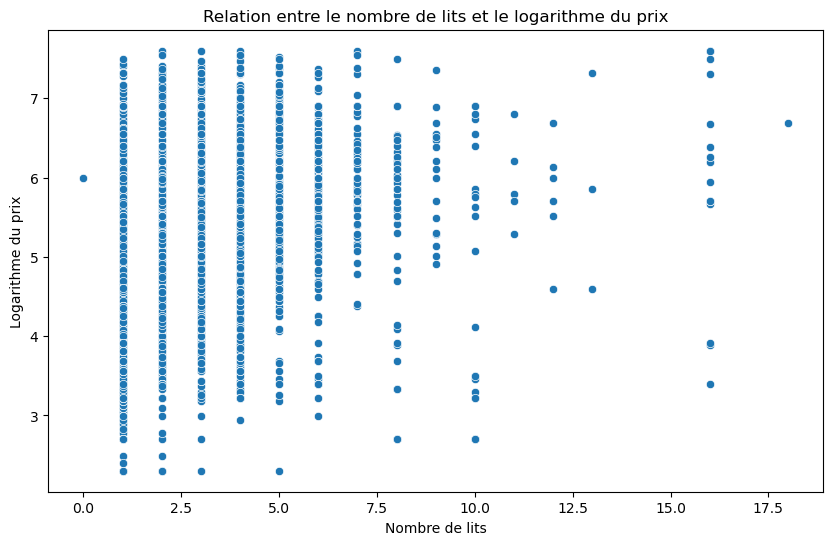

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb_train['beds'], y=airbnb_train['log_price'])
plt.title('Relation entre le nombre de lits et le logarithme du prix')
plt.xlabel('Nombre de lits')
plt.ylabel('Logarithme du prix')
plt.show()

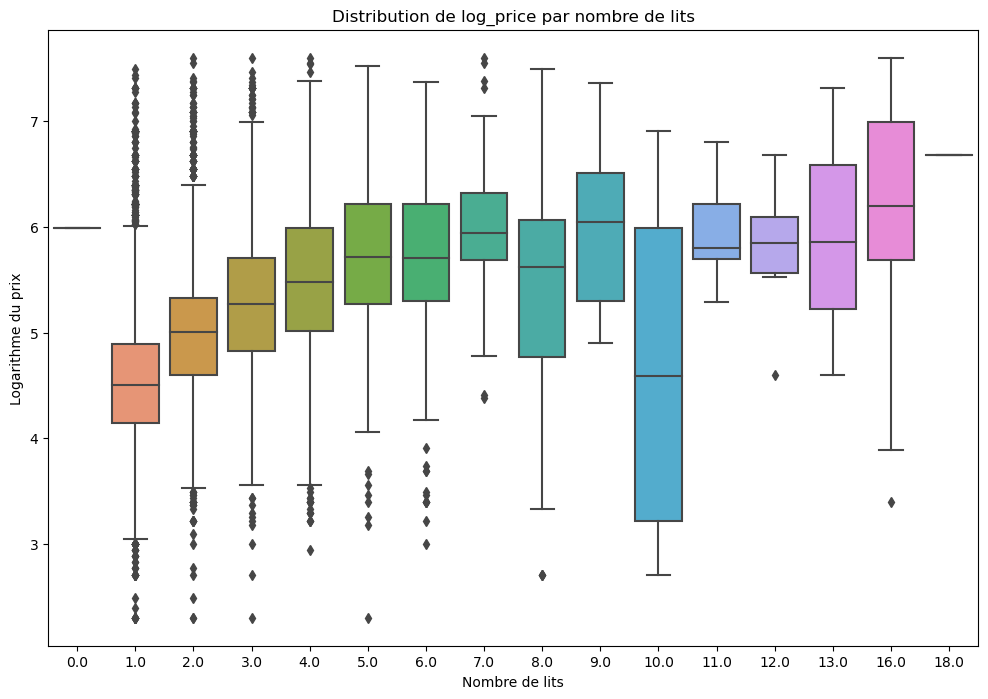

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='beds', y='log_price', data=airbnb_train)
plt.title('Distribution de log_price par nombre de lits')
plt.xlabel('Nombre de lits')
plt.ylabel('Logarithme du prix')
plt.show()

Partie 2 : Prédictions 

In [74]:
X = airbnb_train.drop(columns=['log_price', 'id']) #On garde toutes les colonnes qu'il reste mise à part id et price logiquement 

In [75]:
y = airbnb_train["log_price"] #ici on garde bien évidemment simplement log_price

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

On sépare les données :

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model_results = []

In [79]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_results.append({"Model": model_name, "R^2": r2, "RMSE": rmse})

On décide de tester sur différents modèles : 
- Régression linéiare
- Random Forest 
- SVM
- PCA + régression 
- Gradient (sklearn)
- Gradient (xgboost)

In [80]:
lr_model = LinearRegression()
evaluate_model(lr_model, "Linear Regression")

In [81]:
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, "Random Forest")

In [82]:
svm_model = SVR()
evaluate_model(svm_model, "SVM")

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
lr_pca_model = LinearRegression()
evaluate_model(lr_pca_model, "PCA + Linear Regression")

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_model, "Gradient Boosting")

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
evaluate_model(xgb_model, "XGBoost")

In [85]:
results_df = pd.DataFrame(model_results)

On affiche le résultat des différents modèles :

In [86]:
results_df

,Model,R^2,RMSE
0,Linear Regression,0.574913,0.467706
1,Random Forest,0.683305,0.403696
2,SVM,0.020224,0.710064
3,PCA + Linear Regression,0.574913,0.467706
4,Gradient Boosting,0.689281,0.399869
5,XGBoost,0.700054,0.392876


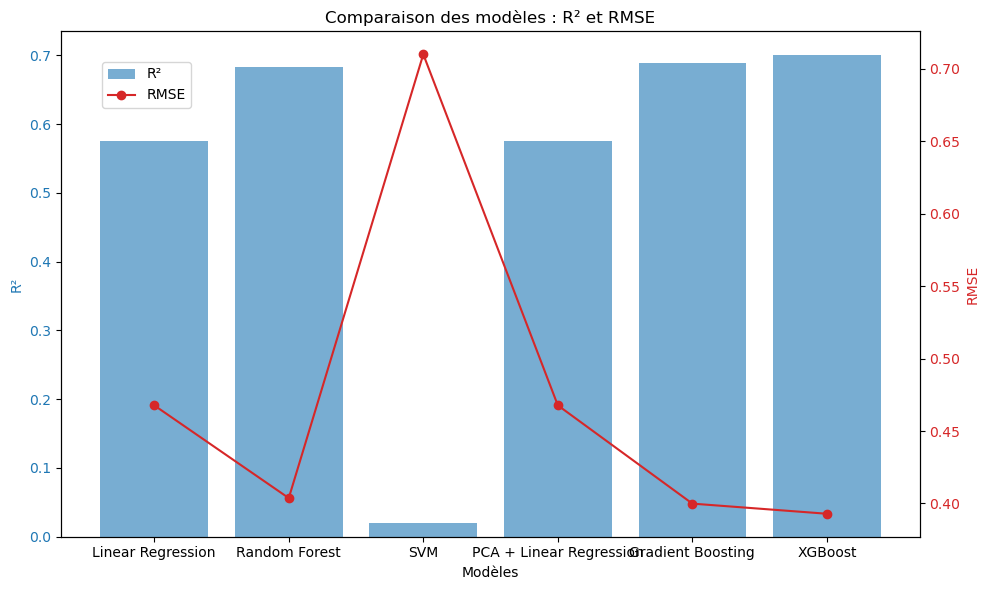

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer le R²
color = 'tab:blue'
ax1.set_xlabel('Modèles')
ax1.set_ylabel('R²', color=color)
ax1.bar(results_df['Model'], results_df['R^2'], color=color, alpha=0.6, label='R²')
ax1.tick_params(axis='y', labelcolor=color)

# Créer un deuxième axe pour RMSE
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('RMSE', color=color)
ax2.plot(results_df['Model'], results_df['RMSE'], color=color, marker='o', label='RMSE')
ax2.tick_params(axis='y', labelcolor=color)

# Ajouter un titre
plt.title('Comparaison des modèles : R² et RMSE')

# Ajouter une légende
fig.tight_layout()  # pour ajuster la disposition du graphique
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Afficher le graphique
plt.show()

On peut donc voir que la méthode du gradient avec XgBoost affiche les meilleures performances 

In [88]:
y_pred = xgb_model.predict(X_test)

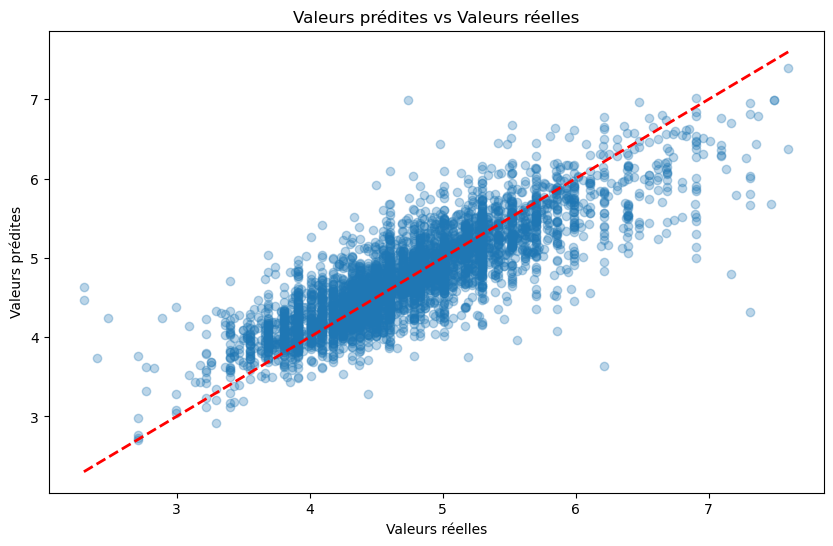

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs prédites vs Valeurs réelles')
plt.show()

<Figure size 1000x600 with 0 Axes>

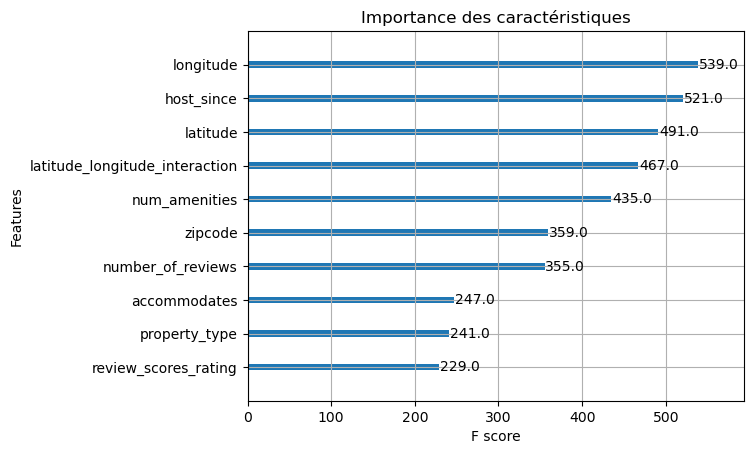

In [90]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('Importance des caractéristiques')
plt.show()

In [91]:
residuals = y_test - y_pred

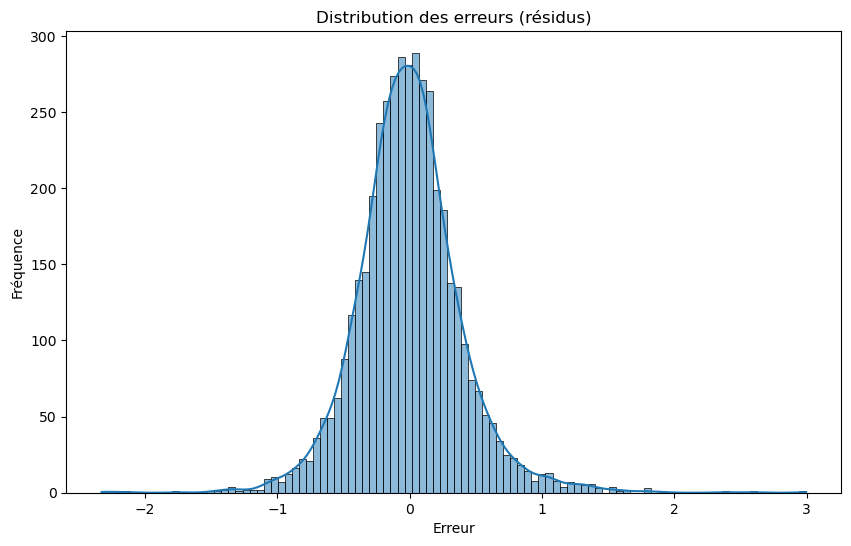

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.title('Distribution des erreurs (résidus)')
plt.show()

In [93]:
from sklearn.model_selection import learning_curve

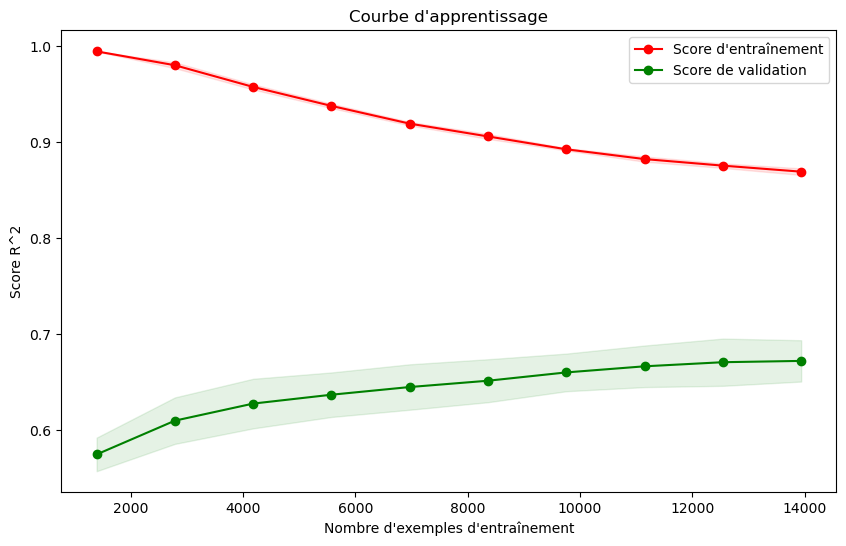

In [94]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Moyenne et écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel('Nombre d\'exemples d\'entraînement')
plt.ylabel('Score R^2')
plt.title('Courbe d\'apprentissage')
plt.legend(loc="best")
plt.show()

Après avoir afficher plusieurs statistiques on va donc décider de trouver les meilleurs hyper-paramètres pour ce modèle : 

In [95]:
param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

In [98]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [99]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.6}


On calcule les résultats du nouveau modèle avec les meilleurs hyper-paramètres

In [100]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [101]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R²:", r2)
print("RMSE:", rmse)

R²: 0.7165942737229887
RMSE: 0.3818899450906377


On obtient un meilleur r² et une meilleure RMSE. 
On va donc maintenant mettre les données du 2ème excel sous le même format que le premier : 

In [102]:
nan_percentage_2 = airbnb_test.isna().mean() * 100
print(nan_percentage_2)

Unnamed: 0                 0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.287218
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.471943
host_has_profile_pic       0.254448
host_identity_verified     0.254448
host_response_rate        24.720011
host_since                 0.254448
instant_bookable           0.000000
last_review               21.417969
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.225668
number_of_reviews          0.000000
review_scores_rating      22.638163
zipcode                    1.278023
bedrooms                   0.125296
beds                       0.185053
dtype: float64


In [103]:
columns_to_drop_na_2 = nan_percentage_2[nan_percentage_2 < 2].index

In [104]:
airbnb_test = airbnb_test.dropna(subset=columns_to_drop_na_2)

In [105]:
airbnb_test['cleaning_fee'] = airbnb_test['cleaning_fee'].astype(int)

In [106]:
airbnb_test['review_scores_rating'].fillna(-1, inplace=True)

In [107]:
airbnb_test = airbnb_test.drop(columns=['first_review', 'last_review'])

In [108]:
airbnb_test['zipcode'] = pd.to_numeric(airbnb_test['zipcode'], errors='coerce')

In [109]:
airbnb_test['host_response_rate'] = airbnb_test['host_response_rate'].apply(convert_response_rate)

In [110]:
airbnb_test['neighbourhood'].fillna('Inconnu', inplace=True)

In [111]:
airbnb_test = airbnb_test.dropna(subset=['zipcode'])

In [112]:
airbnb_test['host_has_profile_pic'] = airbnb_test['host_has_profile_pic'].replace({'t': 1, 'f': 0})
airbnb_test['host_identity_verified'] = airbnb_test['host_identity_verified'].replace({'t': 1, 'f': 0})
airbnb_test['instant_bookable'] = airbnb_test['instant_bookable'].replace({'t': 1, 'f': 0})

In [113]:
airbnb_test['cancellation_policy'] = label_encoder.fit_transform(airbnb_test['cancellation_policy'])

In [114]:
airbnb_test['bed_type'] = label_encoder.fit_transform(airbnb_test['bed_type'])

In [115]:
airbnb_test['room_type'] = label_encoder.fit_transform(airbnb_test['room_type'])

In [116]:
airbnb_test['property_type'] = label_encoder.fit_transform(airbnb_test['property_type'])

In [117]:
airbnb_test['host_since'] = pd.to_datetime(airbnb_test['host_since'], errors='coerce')

In [118]:
airbnb_test['host_since'] = airbnb_test['host_since'].apply(calculate_months_since)

In [119]:
airbnb_test['amenities'] = airbnb_test['amenities'].str.replace('[{}]', '', regex=True).str.replace('"', '')

In [120]:
airbnb_test['num_amenities'] = airbnb_test['amenities'].str.split(',').apply(len)

In [121]:
airbnb_test = airbnb_test.drop(columns=['amenities'])

In [122]:
airbnb_test['city'] = label_encoder.fit_transform(airbnb_test['city'])

In [123]:
airbnb_test = airbnb_test.drop(columns=['neighbourhood'])

In [124]:
airbnb_test = airbnb_test.drop(columns=['name', 'description'])

In [125]:
airbnb_test.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [126]:
airbnb_test['bedrooms_bathrooms_ratio'] = airbnb_test['bedrooms'] / airbnb_test['bathrooms']
airbnb_test['beds_bedrooms_ratio'] = airbnb_test['beds'] / airbnb_test['bedrooms']
airbnb_test['accommodates_bathrooms_ratio'] = airbnb_test['accommodates'] / airbnb_test['bathrooms']
airbnb_test['latitude_longitude_interaction'] = airbnb_test['latitude'] * airbnb_test['longitude']

In [127]:
airbnb_test.replace([np.inf, -np.inf], 0, inplace=True)

airbnb_test.fillna(0, inplace=True)

On va maintenant appliquer le modèle sur ce 2ème jeu de données

In [128]:
X_new = airbnb_test.drop(columns=['id'])

In [129]:
log_price_pred = best_model.predict(X_new)

In [130]:
price_pred = log_price_pred

In [131]:
airbnb_test['Predicted_Price'] = price_pred

In [132]:
output = airbnb_test[['id', 'Predicted_Price']]

On ressort enfin sous un excel nos prédictions : 

In [133]:
output.to_excel("excel_prédiction.xlsx", index=False)

In [134]:
output.head()

,id,Predicted_Price
0,14282777,4.905480
1,17029381,5.886642
2,7824740,4.964480
3,19811650,5.911111
4,12410741,4.482708
